# Twitter airline Sentiment analysis

In this notebook we will be looking at dataset of Airlines tweets in USA by analysing missing data and visualising the sentiments of tweets for each airline and plotting the most frequent words used in both positive and negative tweets and the reason behind the negative tweets and finally we will create a model for predicting sentiments with Naive Bayes Classifier.
Also, calculate accuracies and confusion matrix comparing both the models.




In [83]:
#Importing the Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
#Reading the csv file using pandas
df=pd.read_csv('Tweets-aug10th.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:ylabel='airline'>

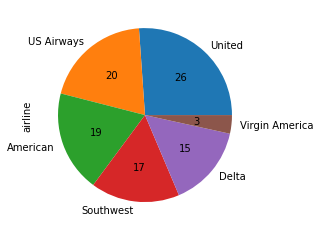

In [85]:
#Visualising the total number of tweets for each airline
df.airline.value_counts().plot(kind='pie',autopct='%1.0f')

# Missing Values

In [86]:
#shape of the dataframe and then check the number of null values in each column to get an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.
print('The shape of the dataframe is {}'.format(df.shape))
print('The no.of null values in each column is \n {}'.format(df.isnull().sum()))

The shape of the dataframe is (14640, 15)
The no.of null values in each column is 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


tweet_id 0.0 % Missing values
airline_sentiment 0.0 % Missing values
airline_sentiment_confidence 0.0 % Missing values
negativereason 0.3731 % Missing values
negativereason_confidence 0.2813 % Missing values
airline 0.0 % Missing values
airline_sentiment_gold 0.9973 % Missing values
name 0.0 % Missing values
negativereason_gold 0.9978 % Missing values
retweet_count 0.0 % Missing values
text 0.0 % Missing values
tweet_coord 0.9304 % Missing values
tweet_created 0.0 % Missing values
tweet_location 0.3233 % Missing values
user_timezone 0.3292 % Missing values


<AxesSubplot:>

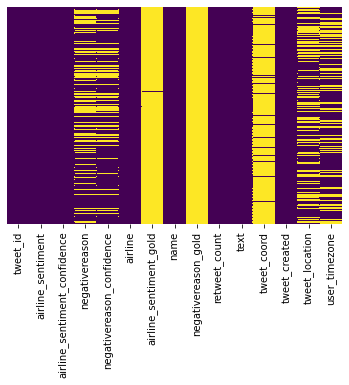

In [87]:
ser=[features for features in df.columns]
for i in ser:
    print(i,np.round(df[i].isnull().mean(),4), '% Missing values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.

In [88]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Exploratory Data Analysis

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


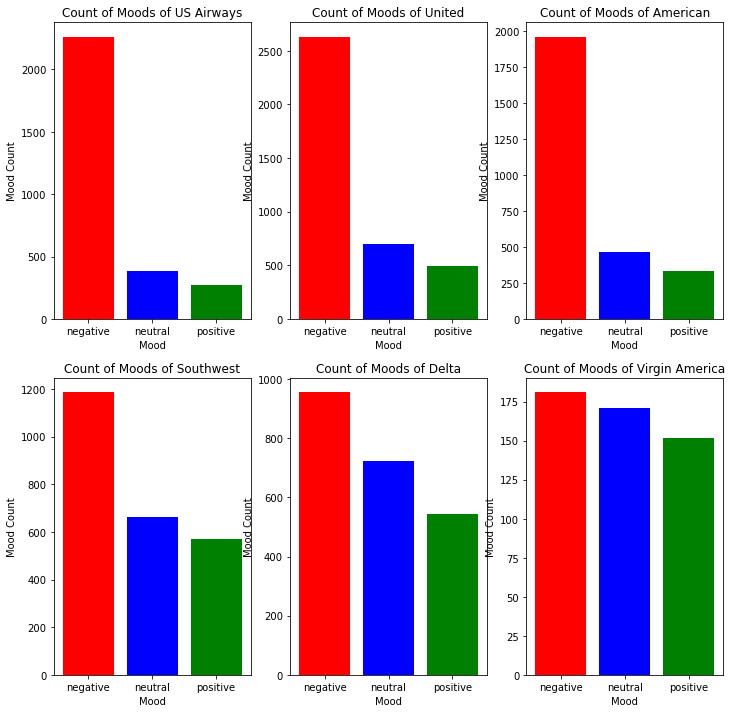

In [89]:
#Visualising the number of tweets for each airline with respect to sentiments of tweets(negative,neutral,postive)

print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'blue', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

United, US Airways, American substantially get negative reactions.
Tweets for Virgin America are the most balanced.

In [90]:
#Using wordcloud get an idea of the most frequent words in negative tweets and positive tweets
from wordcloud import WordCloud,STOPWORDS

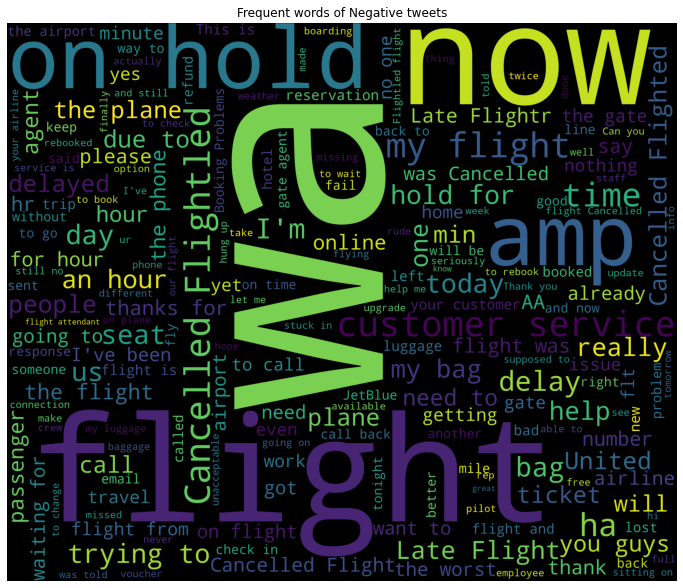

In [91]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Frequent words of Negative tweets')
plt.show()

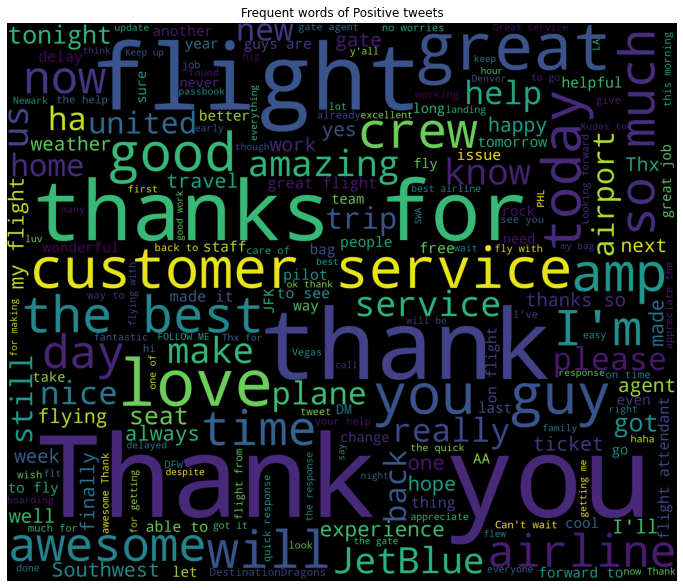

In [92]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Frequent words of Positive tweets')
plt.show()

In [93]:
# Calculating highest frequency words in positive tweets
def freq(str): 
 
    str = str.split()          
    str2 = [] 
  
    for i in str:              
  
        if i not in str2: 
  
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

Words like Thanks, best, customer , love, flying , good are understandably present in the most frequent words of positive tweets.
However, other than these, most of the words are stop words and need to be filtered.

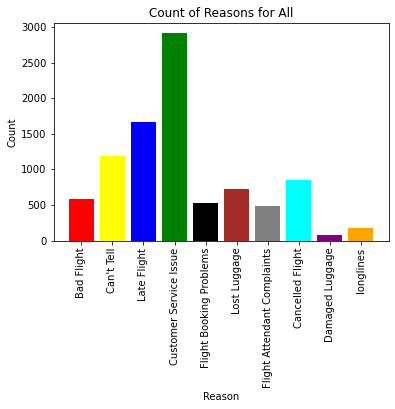

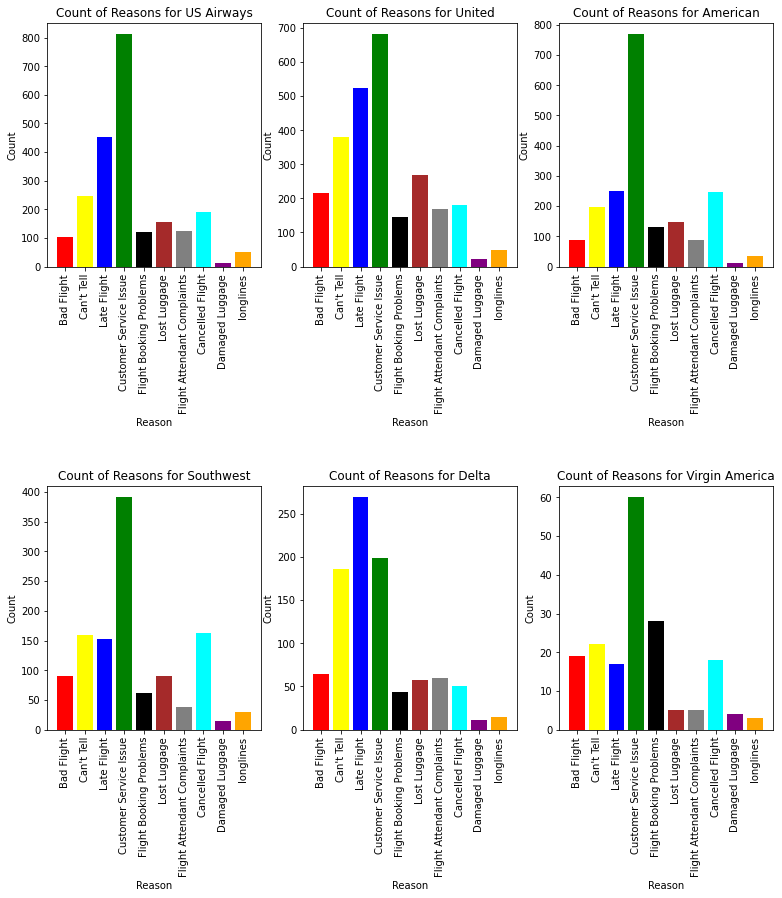

In [94]:
#knowing the reason behind the negative tweets
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America.
Late Flight is the main negative reason for Delta.
Interestingly, Virgin America has the least count of negative reasons (all less than 60).
Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue).

# Is there a relationship between negative sentiments and date ?


Our dataframe has data from 2015-02-17 to 2015-02-24

It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualising this.

In [95]:
date = df.reset_index()
date.tweet_created = pd.to_datetime(date.tweet_created)
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

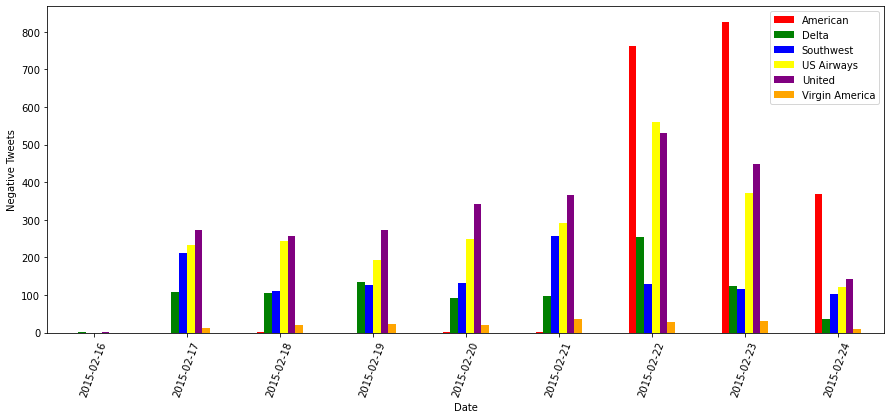

In [96]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)



Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the Total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.


The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

In [97]:
df.head()

,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


# Cleaning the Text data

In [99]:
Features = df.iloc[:,9].values
Labels = df.iloc[:,2].values

In [100]:
import nltk
import re
processed_Features = []

for sentence in range(0,len(Features)):
    #removing all the special character
    processed_Feature = re.sub(r'\W',' ',str(Features[sentence]))

    #removing all single characters
    processed_Feature = re.sub(r'\s+[a-zA-Z]\s+',' ',processed_Feature)

    #removing single characters from the start
    processed_Feature = re.sub(r'\^[a-zA-Z]\s+',' ',processed_Feature)

    #substituting multiple spaces with single space
    processed_Feature = re.sub(r'\s+',' ',processed_Feature,flags=re.I)

    #Removing prefixed 'b'
    processed_Feature = re.sub(r'^b\s+', ' ',processed_Feature)

    #converting into lowercase
    processed_Feature = processed_Feature.lower()
    processed_Features.append(processed_Feature)

# TF-IDF

In [101]:

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_Features = vectorizer.fit_transform(processed_Features).toarray()

# Train-Test Split

In [103]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(processed_Features,Labels,test_size=0.2,random_state=0)

# Build Classifification Models And Error Analysis Comaparison

# Naive Bayes Classifier

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
predictions = classifier.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions))


[[1823   40    7]
 [ 388  204   22]
 [ 213   38  193]]


In [108]:
print('accuracy score',accuracy_score(y_test,predictions))

accuracy score 0.7581967213114754


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

   negative       0.75      0.97      0.85      1870
    neutral       0.72      0.33      0.46       614
   positive       0.87      0.43      0.58       444

avg / total       0.76      0.76      0.73      2928

